In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Dell\OneDrive\Desktop\medical file"

C:\Users\Dell\OneDrive\Desktop\medical file


# The information is gathered from a medical organisation.

In [3]:
medical=pd.read_csv("Medicare_Physician_Other_Practitioners_by_Geography_and_Service_2019.csv",low_memory=False)

In [4]:
medical.shape

(273211, 15)

# data description


* Geography Level - Rndrng_Prvdr_Geo_Lvl - How the data is divided based on the geography
* Rendering Provider Geography Code - Rndrng_Prvdr_Geo_Cd - Pincode
* Rendering Provider Geography Description - State Names - Data aggregated at the National level   are identified by the word 'National'.
* HCPCS Code - HCPCS_Cd - Special Medical Service provided by provider - two levels - Level I       codes are the `Current Procedural Terminology (CPT)`codes that are maintained by the American     Medical Association. Level II codes are created by CMS `(Centers for Medicare & Medicaid         Services.)`to identify products, supplies and services not covered by the CPT codes (such as     ambulance services).
* HCPCS Description - HCPCS_Desc - Description of the HCPCS code for the specific medical service   furnished by the provider. HCPCS descriptions associated with CPT codes are consumer friendly     descriptions provided by the AMA. As a result, the same HCPCS description can be associated       with more than one HCPCS code.
* HCPCS Drug Indicator - HCPCS_Drug_Ind - Identifies whether the HCPCS code for the specific       service furnished by the provider is a HCPCS listed on the Medicare Part B Drug Average Sales     Price (ASP) File
* Place of Service - Place_Of_Srvc - o and f
* Number of Providers - Tot_Rndrng_Prvdrs - Number of providers within HCPCS code and place of     service.
* Number of Services - Tot_Srvcs
* Number of Medicare Beneficiaries - Tot_Benes - Number of distinct Medicare beneficiaries receiving the service for each Rndrng_Prvdr_Geo_Desc and HCPCS_Cd, Place_Of_Srvc.
* Number of Distinct Medicare Beneficiary/Per Day Services - Tot_Bene_Day_Srvcs - Number of         distinct Medicare beneficiary/per day services. Since a given beneficiary may receive multiple   services of the same type (e.g., single vs. multiple cardiac stents) on a single day, this       metric removes double-counting from the line service count to identify whether a unique service   occurred.
* Average Submitted Charge Amount - Avg_Sbmtd_Chrg - Per service charge
* Average Medicare Allowed Amount - Average of the Medicare allowed amount for the service.
* Average Medicare Payment Amount - Avg_Mdcr_Pymt_Amt - Average amount that Medicare paid after     deductible and coinsurance amounts have been deducted for the line item service.
* Average Medicare Standardized Payment Amount - Avg_Mdcr_Stdzd_Amt - Average amount that           Medicare paid after beneficiary deductible and coinsurance amounts have been deducted for the     line item service and after standardization of the Medicare payment has been applied.


In [6]:
medical.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc',
       'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt',
       'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Rndrng_Prvdr_Geo_Lvl   273211 non-null  object
 1   Rndrng_Prvdr_Geo_Cd    260217 non-null  object
 2   Rndrng_Prvdr_Geo_Desc  273211 non-null  object
 3   HCPCS_Cd               273211 non-null  object
 4   HCPCS_Desc             273211 non-null  object
 5   HCPCS_Drug_Ind         273211 non-null  object
 6   Place_Of_Srvc          273211 non-null  object
 7   Tot_Rndrng_Prvdrs      273211 non-null  object
 8   Tot_Benes              273211 non-null  object
 9   Tot_Srvcs              273211 non-null  object
 10  Tot_Bene_Day_Srvcs     273211 non-null  object
 11  Avg_Sbmtd_Chrg         273211 non-null  object
 12  Avg_Mdcr_Alowd_Amt     273211 non-null  object
 13  Avg_Mdcr_Pymt_Amt      273211 non-null  object
 14  Avg_Mdcr_Stdzd_Amt     273211 non-null  object
dtype

to apply the EDA concept to the data Because the data contains incorrect datatypes, 
we update the data types. This means that instead of changing the data,
we change the datatypes to int and float data types.

In [7]:
medical.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      12994
Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

Because just one column has missing data, I set the missing values to 999.

In [8]:
medical.Rndrng_Prvdr_Geo_Cd=medical.Rndrng_Prvdr_Geo_Cd.fillna("999")

according to the data description Some columns have been converted to int data types,
while others have been converted to float data types from object data types.

In [9]:
zfloat=medical[['Tot_Rndrng_Prvdrs','Tot_Benes','Tot_Bene_Day_Srvcs']]

In [10]:
zint=medical[['Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt','Tot_Srvcs']]

In [11]:
zobj=medical[['Rndrng_Prvdr_Geo_Lvl','Rndrng_Prvdr_Geo_Cd','Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd','HCPCS_Desc','HCPCS_Drug_Ind','Place_Of_Srvc',]]

In [12]:
zfloat.Tot_Rndrng_Prvdrs=zfloat.Tot_Rndrng_Prvdrs.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\960673623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zfloat.Tot_Rndrng_Prvdrs=zfloat.Tot_Rndrng_Prvdrs.str.replace(",","")


In [13]:
zfloat.Tot_Benes=zfloat.Tot_Benes.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2672820456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zfloat.Tot_Benes=zfloat.Tot_Benes.str.replace(",","")


In [14]:
zfloat.Tot_Bene_Day_Srvcs=zfloat.Tot_Bene_Day_Srvcs.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\1611202038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zfloat.Tot_Bene_Day_Srvcs=zfloat.Tot_Bene_Day_Srvcs.str.replace(",","")


In [15]:
zfloat=zfloat.astype("int32")

In [16]:
zint.Tot_Srvcs=zint.Tot_Srvcs.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\4107788185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Tot_Srvcs=zint.Tot_Srvcs.str.replace(",","")


In [17]:
zint.Avg_Sbmtd_Chrg=zint.Avg_Sbmtd_Chrg.str.replace("$"," ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\3526454402.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zint.Avg_Sbmtd_Chrg=zint.Avg_Sbmtd_Chrg.str.replace("$"," ")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\3526454402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Sbmtd_Chrg=zint.Avg_Sbmtd_Chrg.str.replace("$"," ")


In [18]:
zint.Avg_Sbmtd_Chrg=zint.Avg_Sbmtd_Chrg.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\3665606375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Sbmtd_Chrg=zint.Avg_Sbmtd_Chrg.str.replace(",","")


In [19]:
zint.Avg_Mdcr_Alowd_Amt=zint.Avg_Mdcr_Alowd_Amt.str.replace("$"," ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2924096660.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zint.Avg_Mdcr_Alowd_Amt=zint.Avg_Mdcr_Alowd_Amt.str.replace("$"," ")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2924096660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Alowd_Amt=zint.Avg_Mdcr_Alowd_Amt.str.replace("$"," ")


In [20]:
zint.Avg_Mdcr_Alowd_Amt=zint.Avg_Mdcr_Alowd_Amt.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\3856357385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Alowd_Amt=zint.Avg_Mdcr_Alowd_Amt.str.replace(",","")


In [21]:
zint.Avg_Mdcr_Pymt_Amt=zint.Avg_Mdcr_Pymt_Amt.str.replace("$"," ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\502483767.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zint.Avg_Mdcr_Pymt_Amt=zint.Avg_Mdcr_Pymt_Amt.str.replace("$"," ")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\502483767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Pymt_Amt=zint.Avg_Mdcr_Pymt_Amt.str.replace("$"," ")


In [22]:
zint.Avg_Mdcr_Pymt_Amt=zint.Avg_Mdcr_Pymt_Amt.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2514000623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Pymt_Amt=zint.Avg_Mdcr_Pymt_Amt.str.replace(",","")


In [23]:
zint.Avg_Mdcr_Stdzd_Amt=zint.Avg_Mdcr_Stdzd_Amt.str.replace("$"," ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2050634655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  zint.Avg_Mdcr_Stdzd_Amt=zint.Avg_Mdcr_Stdzd_Amt.str.replace("$"," ")
C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\2050634655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Stdzd_Amt=zint.Avg_Mdcr_Stdzd_Amt.str.replace("$"," ")


In [24]:
zint.Avg_Mdcr_Stdzd_Amt=zint.Avg_Mdcr_Stdzd_Amt.str.replace(",","")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11192\3504728950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zint.Avg_Mdcr_Stdzd_Amt=zint.Avg_Mdcr_Stdzd_Amt.str.replace(",","")


In [26]:
zint=zint.astype("float64")

My data is now ready for the EDA procedure.

In [27]:
ourdata=pd.concat([zint,zfloat,zobj],axis=1)

In [28]:
ourdata.shape

(273211, 15)

# exploratory data processs

In [29]:
ourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Avg_Sbmtd_Chrg         273211 non-null  float64
 1   Avg_Mdcr_Alowd_Amt     273211 non-null  float64
 2   Avg_Mdcr_Pymt_Amt      273211 non-null  float64
 3   Avg_Mdcr_Stdzd_Amt     273211 non-null  float64
 4   Tot_Srvcs              273211 non-null  float64
 5   Tot_Rndrng_Prvdrs      273211 non-null  int32  
 6   Tot_Benes              273211 non-null  int32  
 7   Tot_Bene_Day_Srvcs     273211 non-null  int32  
 8   Rndrng_Prvdr_Geo_Lvl   273211 non-null  object 
 9   Rndrng_Prvdr_Geo_Cd    273211 non-null  object 
 10  Rndrng_Prvdr_Geo_Desc  273211 non-null  object 
 11  HCPCS_Cd               273211 non-null  object 
 12  HCPCS_Desc             273211 non-null  object 
 13  HCPCS_Drug_Ind         273211 non-null  object 
 14  Place_Of_Srvc          273211 non-nu

In [30]:
#  in eda process of finding central tendency and the discripitive stats we use describe function process.

In [31]:
ourdata.describe()

,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Tot_Srvcs,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs
count,273211.000000,273211.000000,273211.000000,273211.000000,2.732110e+05,273211.000000,2.732110e+05,2.732110e+05
mean,1251.172998,295.727755,235.197030,234.769057,2.372581e+04,267.382433,5.582857e+03,1.096098e+04
std,2316.386139,756.843036,604.144301,607.611636,6.566590e+05,3149.869990,1.180026e+05,3.415823e+05
min,0.010000,0.010000,0.000000,0.010000,1.100000e+01,1.000000,1.100000e+01,1.100000e+01
25%,128.180000,37.240000,29.130000,29.230000,4.000000e+01,12.000000,3.100000e+01,3.800000e+01
50%,446.530000,117.310000,91.140000,91.380000,1.620000e+02,30.000000,1.090000e+02,1.440000e+02
75%,1570.305000,335.415000,266.860000,267.500000,1.083000e+03,98.000000,6.060000e+02,8.505000e+02
max,93181.060000,62142.820000,49501.500000,49501.500000,1.345132e+08,564937.000000,2.359469e+07,9.799789e+07


In [32]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    237.826710
Y    171.049364
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [33]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.HCPCS_Drug_Ind).median()

HCPCS_Drug_Ind
N    97.48
Y     8.08
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [34]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Place_Of_Srvc).mean()

Place_Of_Srvc
F    290.133705
O    168.035720
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [35]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Place_Of_Srvc).median()

Place_Of_Srvc
F    154.500
O     55.065
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [36]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Rndrng_Prvdr_Geo_Lvl).mean()

Rndrng_Prvdr_Geo_Lvl
National    314.806555
State       230.772365
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [37]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Rndrng_Prvdr_Geo_Lvl).median()

Rndrng_Prvdr_Geo_Lvl
National    158.79
State        89.31
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

<AxesSubplot:ylabel='Frequency'>

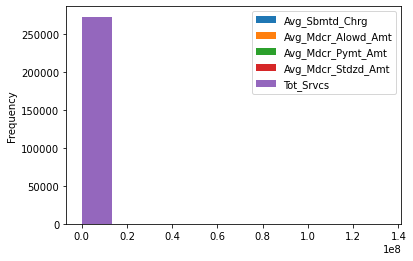

In [38]:
zint.plot(kind='hist')

<AxesSubplot:>

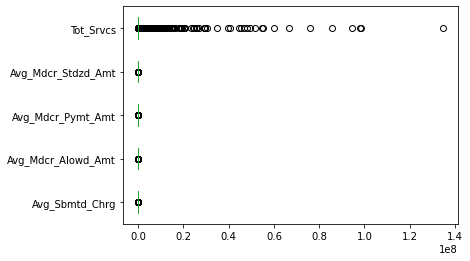

In [39]:
zint.plot(kind='box',vert=False)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:>

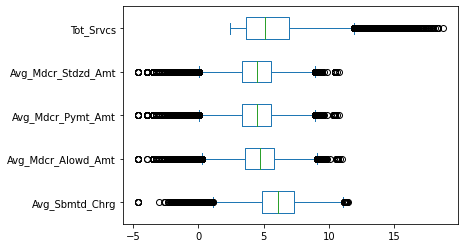

In [40]:
np.log(zint).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

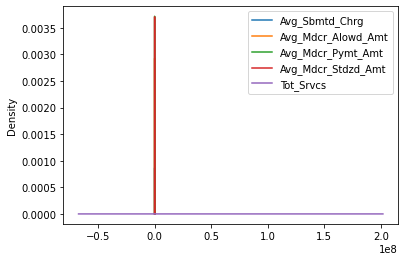

In [41]:
zint.plot(kind="density")

<AxesSubplot:ylabel='Frequency'>

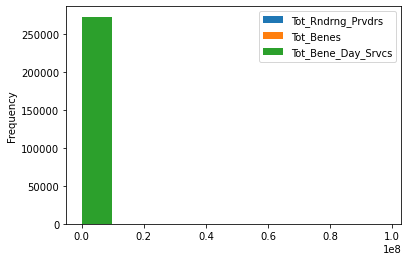

In [42]:
zfloat.plot(kind="hist")

<AxesSubplot:>

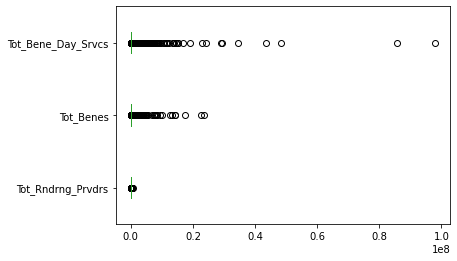

In [43]:
zfloat.plot(kind='box',vert=False)

<AxesSubplot:>

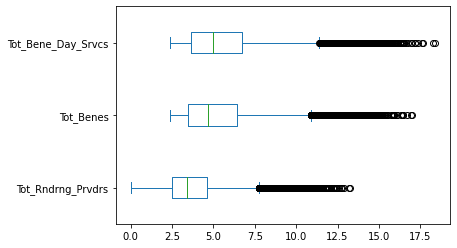

In [44]:
np.log(zfloat).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

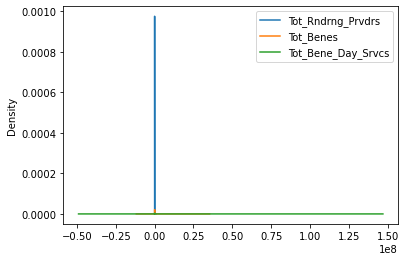

In [45]:
zfloat.plot(kind="density")

<AxesSubplot:ylabel='Density'>

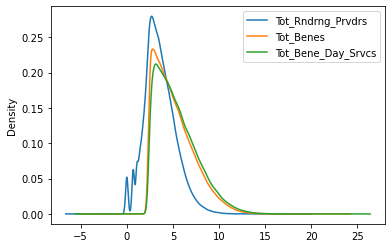

In [46]:
np.log(zfloat).plot(kind="density")

# hypothesis testing data

In [47]:
# ttest,anovatest,chisquaretest. these are three hypothesis testing data
# ttest it is done on the one categorical data and the one numerical data which have the 2 level categorical data

In [48]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    237.826710
Y    171.049364
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [49]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.HCPCS_Drug_Ind).var()

HCPCS_Drug_Ind
N    2.168116e+05
Y    3.540723e+06
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [50]:
N=ourdata[ourdata.HCPCS_Drug_Ind=='N']

In [51]:
Y=ourdata[ourdata.HCPCS_Drug_Ind=='Y']

In [52]:
from scipy.stats import ttest_ind

In [53]:
ttest_ind(N.Avg_Mdcr_Stdzd_Amt,Y.Avg_Mdcr_Stdzd_Amt,equal_var=False)

Ttest_indResult(statistic=3.9634619050937365, pvalue=7.427879445671824e-05)

In [54]:
# here the p value is pvalue=7.427879445671824e-05, 
#  the p value is <0.05 it is significant 

In [55]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Place_Of_Srvc).mean()

Place_Of_Srvc
F    290.133705
O    168.035720
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [56]:
ourdata.Avg_Mdcr_Stdzd_Amt.groupby(ourdata.Place_Of_Srvc).var()

Place_Of_Srvc
F    150429.316721
O    624730.901883
Name: Avg_Mdcr_Stdzd_Amt, dtype: float64

In [57]:
F=ourdata[ourdata.Place_Of_Srvc=='F']

In [58]:
O=ourdata[ourdata.Place_Of_Srvc=='O']

In [59]:
ttest_ind(F.Avg_Mdcr_Stdzd_Amt,O.Avg_Mdcr_Stdzd_Amt,equal_var=False)

Ttest_indResult(statistic=49.639135197836964, pvalue=0.0)

In [60]:
# here the value p is pvalue=0.0 .p value is <0.05
# here it is significant process.

In [61]:
#  anova test  is done on two columns one is categorical and one column is numeric .which have 3 levels of categorical data.
#  in this data their no columns which have 3 levels so we futher we do anova test.

In [62]:
#  chisquare test is done two categorical data.

In [63]:
ourdata.HCPCS_Drug_Ind.value_counts(dropna=False)

N    260701
Y     12510
Name: HCPCS_Drug_Ind, dtype: int64

In [64]:
ourdata.Rndrng_Prvdr_Geo_Lvl.value_counts(dropna=False)

State       260217
National     12994
Name: Rndrng_Prvdr_Geo_Lvl, dtype: int64

In [65]:
ourdata.Place_Of_Srvc.value_counts(dropna=False)

F    149325
O    123886
Name: Place_Of_Srvc, dtype: int64

In [66]:
pd.crosstab(ourdata.HCPCS_Drug_Ind,ourdata.Rndrng_Prvdr_Geo_Lvl)

Rndrng_Prvdr_Geo_Lvl,National,State
HCPCS_Drug_Ind,,
N,12421,248280
Y,573,11937


In [67]:
from scipy.stats import chi2_contingency

In [68]:
chi2_contingency(pd.crosstab(ourdata.HCPCS_Drug_Ind,ourdata.Rndrng_Prvdr_Geo_Lvl))

(0.8532253009977158,
 0.3556415141576682,
 1,
 array([[ 12399.02051528, 248301.97948472],
        [   594.97948472,  11915.02051528]]))

In [69]:
# here is pvalue 0.3556415141576682 it is >0.05 it is non significant 

In [70]:
pd.crosstab(ourdata.HCPCS_Drug_Ind,ourdata.Place_Of_Srvc)

Place_Of_Srvc,F,O
HCPCS_Drug_Ind,,
N,148877,111824
Y,448,12062


In [71]:
chi2_contingency(pd.crosstab(ourdata.HCPCS_Drug_Ind,ourdata.Place_Of_Srvc))

(13797.277058344007,
 0.0,
 1,
 array([[142487.58953702, 118213.41046298],
        [  6837.41046298,   5672.58953702]]))

In [72]:
#  here it is p value 0.0 , p value is <0.05 so it is significant 

In [73]:
pd.crosstab(ourdata.Place_Of_Srvc,ourdata.Rndrng_Prvdr_Geo_Lvl)

Rndrng_Prvdr_Geo_Lvl,National,State
Place_Of_Srvc,,
F,7042,142283
O,5952,117934


In [74]:
chi2_contingency(pd.crosstab(ourdata.Place_Of_Srvc,ourdata.Rndrng_Prvdr_Geo_Lvl))

(1.152041443360135,
 0.2831222114825138,
 1,
 array([[  7101.94336978, 142223.05663022],
        [  5892.05663022, 117993.94336978]]))

In [75]:
# here p value is 0.2831222114825138 it is greater  than 0.05 it is non significant 

In [76]:
obj=ourdata.select_dtypes(include="object")

In [77]:
inte=ourdata.select_dtypes(include=np.number)

In [78]:
obj.shape

(273211, 7)

In [79]:
inte.shape

(273211, 8)

In [80]:
import seaborn as sns

<AxesSubplot:>

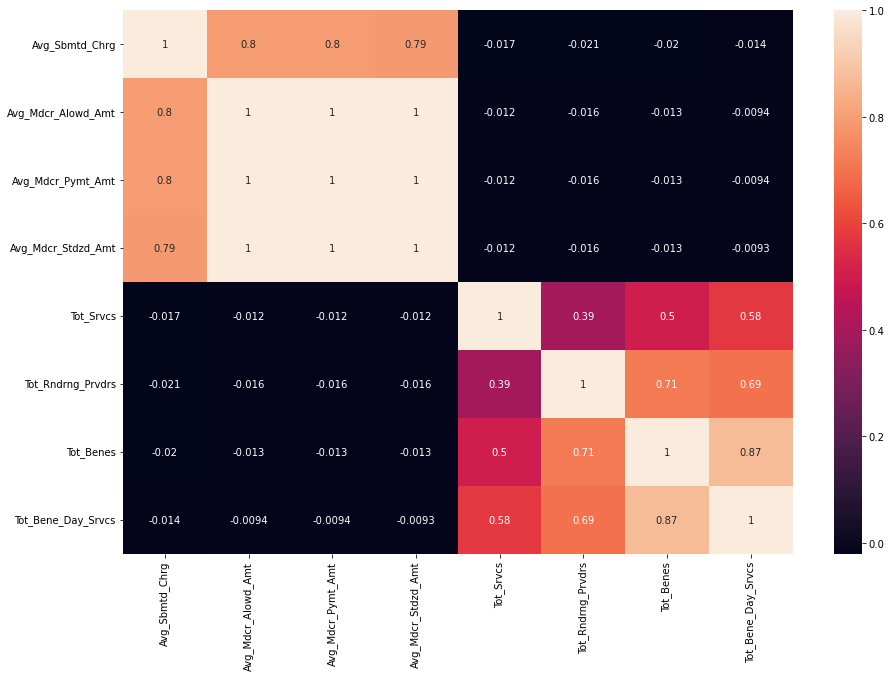

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(inte.corr(),annot=True)

In [82]:
inte.shape

(273211, 8)

In [83]:
inte.columns

Index(['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt',
       'Avg_Mdcr_Stdzd_Amt', 'Tot_Srvcs', 'Tot_Rndrng_Prvdrs', 'Tot_Benes',
       'Tot_Bene_Day_Srvcs'],
      dtype='object')

from the heat map Because there are three columns with multicolinearity, I opted to eliminate two of them.

In [84]:
inte=inte.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt'],axis=1)

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
objdummy=obj.apply(le.fit_transform)

In [88]:
cleandata=pd.concat([inte,objdummy],axis=1)

In [89]:
cleandata.shape

(273211, 13)

 After all of the label encoding, I've chosen to pick one dependency and apply machine learning principles to it.

In [90]:
y=cleandata.Avg_Mdcr_Stdzd_Amt

<AxesSubplot:ylabel='Frequency'>

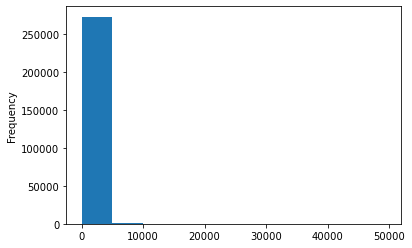

In [91]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

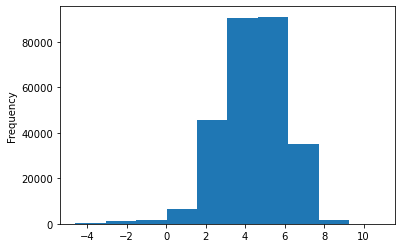

In [92]:
np.log(y).plot(kind='hist')

<AxesSubplot:>

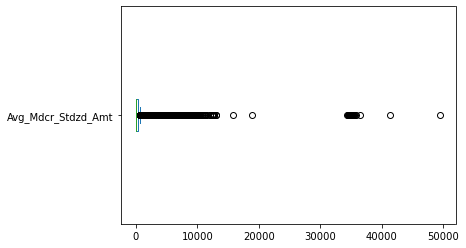

In [93]:
y.plot(kind='box',vert=False)

<AxesSubplot:>

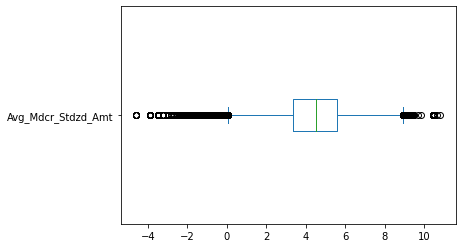

In [94]:
np.log(y).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

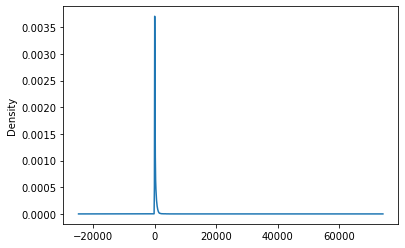

In [95]:
y.plot(kind='density')

<AxesSubplot:ylabel='Density'>

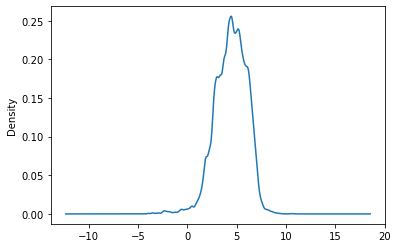

In [96]:
np.log(y).plot(kind='density')

In [97]:
x=cleandata.drop(["Avg_Mdcr_Stdzd_Amt"],axis=1)

# linear regression

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr=LinearRegression()

In [100]:
lrmodel=lr.fit(x,y)

In [101]:
lrmodel.score(x,y)

0.6287330785810232

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
lrpredict=lrmodel.predict(x)

In [104]:
lrres=y-lrpredict

In [105]:
np.sqrt(np.mean(lrres**2))

370.22727929317614

In [106]:
cross_val_score(lrmodel,x,y)

array([0.618882  , 0.63575372, 0.67317509, 0.57951982, 0.60100208])

In [107]:
np.mean(cross_val_score(lrmodel,x,y))

0.6216665416462339

# log of linear regression

In [108]:
lrmodellog=lr.fit(x,np.log(y))

In [109]:
lrmodellog.score(x,np.log(y))

0.5144773881058766

In [110]:
cross_val_score(lrmodellog,x,np.log(y))

array([0.23399954, 0.51840963, 0.51461977, 0.51091111, 0.4974536 ])

In [111]:
np.mean(cross_val_score(lrmodellog,x,np.log(y)))

0.45507872758164103

In [112]:
lrpredictlog=lrmodellog.predict(x)

In [113]:
lrpredictlog=np.exp(lrpredictlog)

In [114]:
lrpredictlog

array([191.88185546, 196.96222401, 342.86302044, ...,   6.29825973,
         6.26298647,   6.09478775])

In [115]:
lrlogres=y-lrpredictlog

In [117]:
np.sqrt(np.mean(lrlogres**2))

554894522874.4698

# decission treee

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
dt=DecisionTreeRegressor(max_depth=9)

In [120]:
dtmodel=dt.fit(x,y)

In [121]:
dtmodel.score(x,y)

0.9237217927495589

In [122]:
cross_val_score(dtmodel,x,y)

array([0.82741918, 0.91195508, 0.91364325, 0.88923839, 0.89285939])

In [123]:
np.mean(cross_val_score(dtmodel,x,y))

0.8548747843172123

In [124]:
dtpre=dtmodel.predict(x)

In [125]:
dtres=y-dtpre

In [126]:
np.sqrt(np.mean(dtres**2))

167.81297079813464

# decissiontreee log

In [127]:
dtmodellog=dt.fit(x,np.log(y))

In [128]:
dtmodellog.score(x,np.log(y))

0.9111321949086545

In [129]:
cross_val_score(dtmodellog,x,np.log(y))

array([0.8920091 , 0.91470681, 0.91165672, 0.90923664, 0.89196877])

In [130]:
np.mean(cross_val_score(dtmodellog,x,np.log(y)))

0.9038741616721098

In [131]:
dtprelog=dtmodellog.predict(x)

In [132]:
dtprelog=np.exp(dtprelog)

In [133]:
dtreslog=y-dtprelog

In [134]:
np.sqrt(np.mean(dtreslog**2))

220.11060884772488

# RandomForestRegressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rf=RandomForestRegressor(max_depth=5,n_estimators=50)

In [137]:
rfmodel=rf.fit(x,y)

In [138]:
rfmodel.score(x,y)

0.869528943670689

In [139]:
cross_val_score(rfmodel,x,y)

array([0.82360812, 0.84890219, 0.85433574, 0.86287671, 0.85473209])

In [140]:
np.mean(cross_val_score(rfmodel,x,y))

0.8484266043298389

In [141]:
rfmodelpre=rfmodel.predict(x)

In [142]:
rfres=y-rfmodelpre

In [143]:
np.sqrt(np.mean(rfres**2))

219.4736449794004

# random forest log

In [144]:
rfmodellog=rf.fit(x,np.log(y))

In [145]:
rfmodellog.score(x,np.log(y))

0.884947541389696

In [146]:
cross_val_score(rfmodellog,x,np.log(y))

array([0.88022336, 0.89302554, 0.89173504, 0.88577052, 0.86868376])

In [147]:
np.mean(cross_val_score(rfmodellog,x,np.log(y)))

0.8838042434439941

In [148]:
rfmodelprelog=rfmodellog.predict(x)

In [149]:
rfmodelprelog=np.exp(rfmodelprelog)

In [150]:
rfreslog=y-rfmodelprelog

In [151]:
np.sqrt(np.mean(rfreslog**2))

449.40447293473454

# gradient boosting method

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
gbm=GradientBoostingRegressor()

In [154]:
gbmmodel=gbm.fit(x,y)

In [155]:
gbmmodel.score(x,y)

0.9063870367747435

In [156]:
cross_val_score(gbmmodel,x,y)

array([0.82806042, 0.88222971, 0.87430114, 0.88872821, 0.85581507])

In [157]:
np.mean(cross_val_score(gbmmodel,x,y))

0.8638064973899663

In [158]:
gbmmodelpred=gbmmodel.predict(x)

In [159]:
gbmres=y-gbmmodelpred

In [160]:
np.sqrt(np.mean(gbmres**2))

185.90594727804734

# gbm model log

In [161]:
gbmmodellog=gbm.fit(x,np.log(y))

In [162]:
gbmmodellog.score(x,np.log(y))

0.9091778933596482

In [163]:
cross_val_score(gbmmodellog,x,np.log(y))

array([0.89590086, 0.91088922, 0.91036863, 0.90532272, 0.88738306])

In [164]:
np.mean(cross_val_score(gbmmodellog,x,np.log(y)))

0.9020202972327311

In [165]:
gbmmodelpredlog=gbmmodellog.predict(x)

In [166]:
gbmmodelpredlog=np.exp(gbmmodelpredlog)

In [167]:
gbmreslog=y-gbmmodelpredlog

In [168]:
np.sqrt(np.mean(gbmreslog**2))

331.8666434888501

## I have one test column with sentences that I do nlp on and break into words as columns in order to build a better fitting model.
# natural language preprocessing for test data in the 

In [169]:
# text column is
text=ourdata.HCPCS_Desc

In [396]:
text.head(10)

,tweet
0,liver disease ten biochemical assays alt a mac...
1,test for detecting genes associated with prost...
2,anesthesia for procedure on salivary gland wit...
3,anesthesia for procedure on salivary gland wit...
4,anesthesia for procedure to repair lip defect ...
5,anesthesia for procedure on eyelid
6,anesthesia for procedure on eyelid
7,anesthesia for electric shock treatment
8,anesthesia for electric shock treatment
9,anesthesia for biopsy of external middle and i...


# I removed all the unwanted data digits, symbols, alphanumeric integers, and alphanumeric words using the def function. As importing re.

In [171]:
import re

In [172]:
def santosh(minetext):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",minetext).split())

In [173]:
text=[str(santosh(minetext)) for minetext in text]

In [174]:
text=pd.DataFrame(text)

In [175]:
text.columns=['tweet']

In [176]:
#  all the text in pur data is converted into the lower order
text.tweet=text.tweet.str.lower()

In [177]:
from nltk.corpus import stopwords

In [178]:
#  the stopwords contains some english common words which are common in regular usage so by using it i used to remove it 
stop_words=set(stopwords.words("english"))

In [179]:
textwords=text.tweet.str.split()

In [180]:
textwords= text.tweet.str.findall('\w{3,}').str.join(' ')

In [181]:
len(textwords)

273211

### utilising a word cloud In the graphic,I used to show some of the top counted terms.

In [183]:
from wordcloud import WordCloud

## The larger count word in this graphic denotes a larger size. The size of the lower count word is smaller.

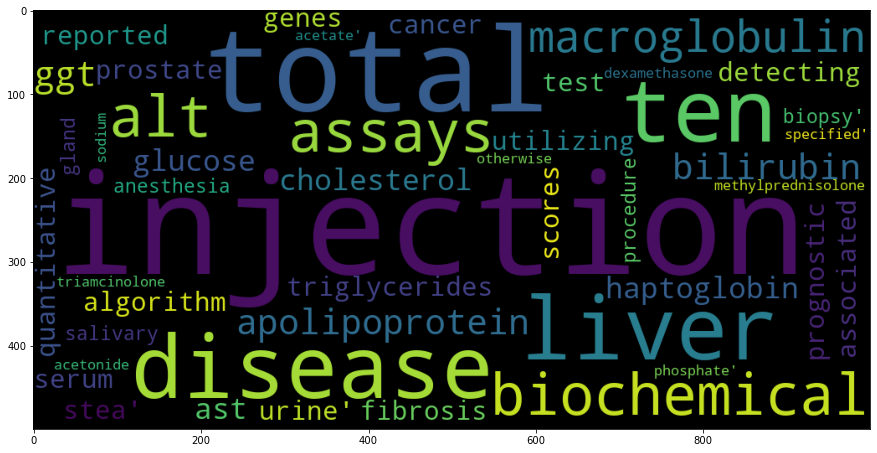

In [184]:
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=stop_words,max_words=1000).generate(
    str(textwords.values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

## I took the top 300 words from the clean text data using counter vectorizer.

In [186]:
vectorizer = CountVectorizer(stop_words=stop_words,max_features=300)

In [187]:
X = vectorizer.fit_transform(textwords)

In [188]:
maintext=pd.DataFrame(X.toarray(),columns=vectorizer.vocabulary_)

In [189]:
objdummy.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc'],
      dtype='object')

In [190]:
#  removing the test column from the data to add our nlp procesed text columns.
objdummy=objdummy.drop(['HCPCS_Desc'],axis=1)

In [191]:
maintext.shape

(273211, 300)

In [397]:
maintext.head(10)

,liver,total,test,prostate,cancer,urine,anesthesia,procedure,gland,biopsy,...,observation,programming,qualified,professional,nursing,facility,typically,office,initial,subsequent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
#  adding all the data.
npltextcleandata=pd.concat([inte,objdummy,maintext],axis=1)

In [194]:
npltextcleandata.shape

(273211, 312)

In [195]:
yy=npltextcleandata.Avg_Mdcr_Stdzd_Amt

In [196]:
xx=npltextcleandata.drop(["Avg_Mdcr_Stdzd_Amt"],axis=1)

In [197]:
yy.shape

(273211,)

In [198]:
xx.shape

(273211, 311)

# model prediction

# linear regression

In [199]:
nlplrmodel=lr.fit(xx,yy)

In [200]:
nlplrmodel.score(xx,yy)

0.6464709447408222

In [201]:
cross_val_score(nlplrmodel,xx,yy)

array([-1.32063776e+13,  6.51944981e-01,  6.91489639e-01,  5.97013603e-01,
        6.13096419e-01])

In [202]:
np.mean(cross_val_score(nlplrmodel,xx,yy))

-2641275512822.3047

In [203]:
nlplrmodelpre=nlplrmodel.predict(xx)

In [204]:
nlpres=y-nlplrmodelpre

In [205]:
np.sqrt(np.mean(nlpres**2))

361.2749448789643

# linear log

In [206]:
nlplrmodellog=lr.fit(xx,np.log(yy))

In [207]:
nlplrmodellog.score(xx,np.log(yy))

0.6729075396570277

In [208]:
cross_val_score(nlplrmodellog,xx,np.log(yy))

array([-7.43092835e+11,  6.79413661e-01,  6.76162059e-01,  6.68973109e-01,
        6.64520190e-01])

In [209]:
np.mean(cross_val_score(nlplrmodellog,xx,np.log(yy)))

-148618566976.00174

In [210]:
nlplrmodelprelog=nlplrmodellog.predict(xx)

In [211]:
nlplrmodelprelog=np.exp(nlplrmodelprelog)

In [212]:
nlpreslog=y-nlplrmodelprelog

In [213]:
np.sqrt(np.mean(nlpreslog**2))

507612549.6947609

# decission treee

In [214]:
nlpdtmodel=dt.fit(xx,yy)

In [215]:
nlpdtmodel.score(xx,yy)

0.9235490222634257

In [216]:
cross_val_score(nlpdtmodel,xx,yy)

array([0.84503513, 0.92000415, 0.92021342, 0.8992102 , 0.89609184])

In [217]:
np.mean(cross_val_score(nlpdtmodel,xx,yy))

0.8887047208486857

In [218]:
nlpdtmodelpre=nlpdtmodel.predict(xx)

In [219]:
nlpdtres=y-nlpdtmodelpre

In [220]:
np.sqrt(np.mean(nlpdtres**2))

168.00291187543024

# decission tree log

In [221]:
nlpdtmodellog=dt.fit(xx,np.log(yy))

In [222]:
nlpdtmodellog.score(xx,np.log(yy))

0.9113085617444888

In [223]:
cross_val_score(nlpdtmodellog,xx,np.log(yy))

array([0.89461262, 0.91529673, 0.91316565, 0.90871922, 0.89479215])

In [224]:
np.mean(cross_val_score(nlpdtmodellog,xx,np.log(yy)))

0.9052917377007835

In [225]:
nlpdtmodelprelog=nlpdtmodellog.predict(xx)

In [226]:
nlpdtmodelprelog=np.exp(nlpdtmodelprelog)

In [390]:
nlpdtreslog=y-nlpdtmodelprelog

In [228]:
np.sqrt(np.mean(nlpdtreslog**2))

206.37069872937522

# randorm foreset

In [229]:
nlprfmodel=rf.fit(xx,yy)

In [230]:
nlprfmodel.score(xx,yy)

0.8697293052362143

In [231]:
cross_val_score(nlprfmodel,xx,yy)

array([0.82394959, 0.84997214, 0.85098587, 0.87031169, 0.85150652])

In [232]:
np.mean(cross_val_score(nlprfmodel,xx,yy))

0.8493317595462994

In [233]:
nlprfmodelpre=nlprfmodel.predict(xx)

In [234]:
nlprespre=y-nlprfmodelpre

In [235]:
np.sqrt(np.mean(nlprespre**2))

219.3050597781107

# rf model log

In [236]:
nlprfmodellog=rf.fit(xx,np.log(yy))

In [237]:
nlprfmodellog.score(xx,np.log(yy))

0.885374596204954

In [238]:
cross_val_score(nlprfmodellog,xx,np.log(yy))

array([0.88044902, 0.89362495, 0.89244599, 0.8862696 , 0.86927005])

In [239]:
np.mean(cross_val_score(nlprfmodellog,xx,np.log(yy)))

0.8843749543844943

In [240]:
nlprfmodelprelog=nlprfmodellog.predict(xx)

In [241]:
nlprfmodelprelog=np.exp(nlprfmodelprelog)

In [242]:
nlpresprelog=y-nlprfmodelprelog

In [243]:
np.sqrt(np.mean(nlpresprelog**2))

449.44871938344426

# gradient boosting method

In [244]:
nlpgbmmodel=gbm.fit(xx,yy)

In [245]:
nlpgbmmodel.score(xx,yy)

0.9070254590364055

In [246]:
cross_val_score(nlpgbmmodel,xx,yy)

array([0.83333091, 0.89235212, 0.89423497, 0.89755932, 0.86615981])

In [247]:
np.mean(cross_val_score(nlpgbmmodel,xx,yy))

0.8779228941107868

In [248]:
nlpgbmodelpre=nlpgbmmodel.predict(xx)

In [249]:
nlpgbmres=y-nlpgbmodelpre

In [250]:
np.sqrt(np.mean(nlpgbmres**2))

185.2709415111702

# gradient bossting method log

In [251]:
nlpgbmmodellog=gbm.fit(xx,np.log(yy))

In [252]:
nlpgbmmodellog.score(xx,np.log(yy))

0.9101047633180509

In [253]:
cross_val_score(nlpgbmmodellog,xx,np.log(yy))

array([0.89736726, 0.91350836, 0.91283338, 0.90774424, 0.89104361])

In [254]:
np.mean(cross_val_score(nlpgbmmodellog,xx,np.log(yy)))

0.9044992325955314

In [255]:
nlpgbmmodelpre=nlpgbmmodellog.predict(xx)

In [256]:
nlpgbmmodelpre=np.exp(nlpgbmmodelpre)

In [257]:
nlpgbmres=y-nlpgbmmodelpre

In [258]:
np.sqrt(np.mean(nlpgbmres**2))

388.2842660154115

## In machine learning, there is no distinction between the usual procedure and the natural language process of model development. I used to check with better clarity by separating the train data into test and train data for the next step. as well as testing the cart model approaches

In [259]:
# spliting train hole data into train data test data with 80% and 20% data.

In [260]:
# before nlp doing on our text file

In [261]:
from sklearn.model_selection import train_test_split

In [262]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [267]:
print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(218568,)
(54643,)
(218568, 12)
(54643, 12)


In [268]:
# builting in the model to the splited train and test data
# x_train,x_test,y_train,y_train.

#  normal linear regg

In [269]:
lr

LinearRegression()

In [270]:
splitlrmodel=lr.fit(x_train,y_train)

In [271]:
splitlrmodel.score(x_train,y_train)

0.6316933840310883

In [272]:
cross_val_score(splitlrmodel,x_train,y_train)

array([0.65145507, 0.61770205, 0.6574702 , 0.60535072, 0.6308772 ])

In [273]:
np.mean(cross_val_score(splitlrmodel,x_train,y_train))

0.6325710490094111

In [274]:
splitlrmodel.score(x_test,y_test)

0.6119227191381961

In [275]:
cross_val_score(splitlrmodel,x_test,y_test)

array([0.56687927, 0.6037733 , 0.6129607 , 0.641816  , 0.65390665])

In [276]:
np.mean(cross_val_score(splitlrmodel,x_test,y_test))

0.6158671853834805

#  normal linear regg log

In [277]:
splitlrmodellog=lr.fit(x_train,np.log(y_train))

In [278]:
splitlrmodellog.score(x_train,np.log(y_train))

0.5138934326270176

In [279]:
cross_val_score(splitlrmodellog,x_train,np.log(y_train))

array([0.51279542, 0.51468984, 0.51524791, 0.51287076, 0.51318046])

In [280]:
np.mean(cross_val_score(splitlrmodellog,x_train,np.log(y_train)))

0.5137568779446315

In [281]:
splitlrmodellog.score(x_test,np.log(y_test))

0.5167120019817323

In [282]:
cross_val_score(splitlrmodellog,x_test,np.log(y_test))

array([0.51912774, 0.50729697, 0.50256351, 0.52153158, 0.53009876])

In [283]:
np.mean(cross_val_score(splitlrmodellog,x_test,np.log(y_test)))

0.516123710792612

# decission tree

In [284]:
dt

DecisionTreeRegressor(max_depth=9)

In [285]:
splitdtmodel=dt.fit(x_train,y_train)

In [286]:
splitdtmodel.score(x_train,y_train)

0.9276023422352906

In [287]:
cross_val_score(splitdtmodel,x_train,y_train)

array([0.82819893, 0.83230394, 0.84609322, 0.89632821, 0.9330712 ])

In [288]:
np.mean(cross_val_score(splitdtmodel,x_train,y_train))

0.8702749342134904

In [289]:
splitdtmodel.score(x_test,y_test)

0.8937453148197511

In [290]:
cross_val_score(splitdtmodel,x_test,y_test)

array([0.89262706, 0.79213998, 0.7761685 , 0.87445546, 0.86738867])

In [291]:
np.mean(cross_val_score(splitdtmodel,x_test,y_test))

0.8409185208287763

# decission tree log

In [292]:
splitdtmodellog=dt.fit(x_train,np.log(y_train))

In [293]:
splitdtmodellog.score(x_train,np.log(y_train))

0.9117498537440882

In [294]:
cross_val_score(splitdtmodellog,x_train,np.log(y_train))

array([0.90930726, 0.90544434, 0.90932049, 0.90634765, 0.90790587])

In [295]:
np.mean(cross_val_score(splitdtmodellog,x_train,np.log(y_train)))

0.9076677634211384

In [296]:
splitdtmodellog.score(x_test,np.log(y_test))

0.9085872842542437

In [297]:
cross_val_score(splitdtmodellog,x_test,np.log(y_test))

array([0.90477085, 0.90275964, 0.89629007, 0.90480581, 0.90560968])

In [298]:
np.mean(cross_val_score(splitdtmodellog,x_test,np.log(y_test)))

0.90276681060114

#  random forest model

In [299]:
rf

RandomForestRegressor(max_depth=5, n_estimators=50)

In [300]:
splitrfmodel=dt.fit(x_train,y_train)

In [301]:
splitrfmodel.score(x_train,y_train)

0.9276023422352906

In [302]:
cross_val_score(splitrfmodel,x_train,y_train)

array([0.82873397, 0.83320974, 0.84178566, 0.90979176, 0.93303224])

In [303]:
np.mean(cross_val_score(splitrfmodel,x_train,y_train))

0.8695630075281684

In [304]:
splitrfmodel.score(x_test,y_test)

0.8893056938561461

In [305]:
cross_val_score(splitrfmodel,x_test,y_test)

array([0.89495691, 0.79226468, 0.77583753, 0.87311498, 0.87708783])

In [306]:
np.mean(cross_val_score(splitrfmodel,x_test,y_test))

0.8421324669525478

#  random forest model log

In [307]:
splitrfmodellog=dt.fit(x_train,np.log(y_train))

In [308]:
splitrfmodellog.score(x_train,np.log(y_train))

0.9117491658764756

In [309]:
cross_val_score(splitrfmodellog,x_train,np.log(y_train))

array([0.90930672, 0.90542995, 0.9092166 , 0.90638771, 0.90798125])

In [310]:
np.mean(cross_val_score(splitrfmodellog,x_train,np.log(y_train)))

0.9077024583484758

In [311]:
splitrfmodellog.score(x_test,np.log(y_test))

0.9085146664559363

In [312]:
cross_val_score(splitrfmodellog,x_test,np.log(y_test))

array([0.90430004, 0.90279119, 0.89664072, 0.90457248, 0.90645032])

In [313]:
np.mean(cross_val_score(splitrfmodellog,x_test,np.log(y_test)))

0.9030007099596349

#  gradient boosting method 

In [314]:
gbm

GradientBoostingRegressor()

In [315]:
splitgbmmodel=gbm.fit(x_train,y_train)

In [316]:
splitgbmmodel.score(x_train,y_train)

0.9122382318377827

In [317]:
cross_val_score(splitgbmmodel,x_train,y_train)

array([0.85216285, 0.86319483, 0.84362699, 0.87669546, 0.91225552])

In [318]:
np.mean(cross_val_score(splitgbmmodel,x_train,y_train))

0.8706689320249821

In [319]:
splitgbmmodel.score(x_test,y_test)

0.873706024091472

In [320]:
cross_val_score(splitgbmmodel,x_test,y_test)

array([0.90697596, 0.84117908, 0.79214717, 0.87701972, 0.89185729])

In [321]:
np.mean(cross_val_score(splitgbmmodel,x_test,y_test))

0.8611692154609475

#  gradient boosting model log

In [322]:
splitgbmmodellog=gbm.fit(x_train,np.log(y_train))

In [323]:
splitgbmmodellog.score(x_train,np.log(y_train))

0.9094983119537658

In [324]:
cross_val_score(splitgbmmodellog,x_train,np.log(y_train))

array([0.90966281, 0.90713915, 0.90827064, 0.9083649 , 0.90932547])

In [325]:
np.mean(cross_val_score(splitgbmmodellog,x_train,np.log(y_train)))

0.9085518047105066

In [326]:
splitgbmmodellog.score(x_test,np.log(y_test))

0.9087227939266175

In [327]:
cross_val_score(splitgbmmodellog,x_test,np.log(y_test))

array([0.90933182, 0.90854219, 0.90167695, 0.91219097, 0.90909316])

In [328]:
np.mean(cross_val_score(splitgbmmodellog,x_test,np.log(y_test)))

0.908148572661522

### For the nlp model data, separate the train and test data. nlp data processing data model as per spliting the data

In [329]:
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2)

# linear model fitting for spliting data

In [330]:
lr

LinearRegression()

In [331]:
nlplrsplit=lr.fit(xx_train,yy_train)

In [332]:
nlplrsplit.score(xx_train,yy_train)

0.6449645740563554

In [333]:
cross_val_score(nlplrsplit,xx_train,yy_train)

array([-5.92558249e+05,  6.17612188e-01,  6.79127918e-01,  6.48695052e-01,
        6.41974709e-01])

In [334]:
np.mean(cross_val_score(nlplrsplit,xx_train,yy_train))

-118511.13231602192

In [335]:
nlplrsplit.score(xx_test,yy_test)

0.6526089352615816

In [336]:
cross_val_score(nlplrsplit,xx_test,yy_test)

array([-4.94118253e+06, -1.36372664e+07,  6.23025292e-01,  6.93051646e-01,
        6.86343101e-01])

In [337]:
np.mean(cross_val_score(nlplrsplit,xx_test,yy_test))

-3715689.394882112

# log linear regression

In [338]:
nlplrsplitlog=lr.fit(xx_train,np.log(yy_train))

In [339]:
nlplrsplitlog.score(xx_train,np.log(yy_train))

0.6723752695113356

In [340]:
cross_val_score(nlplrsplitlog,xx_train,np.log(yy_train))

array([-1.10443617e+06,  6.70725194e-01,  6.71697659e-01,  6.75737658e-01,
        6.70479575e-01])

In [341]:
np.mean(cross_val_score(nlplrsplitlog,xx_train,np.log(yy_train)))

-220886.69682097266

In [342]:
nlplrsplitlog.score(xx_test,np.log(yy_test))

0.6746362984839047

In [343]:
cross_val_score(nlplrsplitlog,xx_test,np.log(yy_test))

array([-2.10240404e+07, -4.66241006e+07,  6.72623956e-01,  6.76087557e-01,
        6.75094560e-01])

In [344]:
np.mean(cross_val_score(nlplrsplitlog,xx_test,np.log(yy_test)))

-13529627.792351302

# decission tree

In [345]:
dt

DecisionTreeRegressor(max_depth=9)

In [346]:
nlpdtsplit=dt.fit(xx_train,yy_train)

In [347]:
nlpdtsplit.score(xx_train,yy_train)

0.926849232443383

In [348]:
cross_val_score(nlpdtsplit,xx_train,yy_train)

array([0.90811768, 0.88658395, 0.80120805, 0.87881801, 0.90639072])

In [349]:
np.mean(cross_val_score(nlpdtsplit,xx_train,yy_train))

0.8639917183250801

In [350]:
nlpdtsplit.score(xx_test,yy_test)

0.8934529159661377

In [351]:
cross_val_score(nlpdtsplit,xx_test,yy_test)

array([0.74648577, 0.85792984, 0.92259712, 0.82228593, 0.2722065 ])

In [352]:
np.mean(cross_val_score(nlpdtsplit,xx_test,yy_test))

0.8475197240542597

# decission tree log

In [353]:
nlpdtsplitlog=dt.fit(xx_train,np.log(yy_train))

In [354]:
nlpdtsplitlog.score(xx_train,np.log(yy_train))

0.9121675622475011

In [355]:
cross_val_score(nlpdtsplitlog,xx_train,np.log(yy_train))

array([0.91072788, 0.90951036, 0.90745337, 0.90635309, 0.90911767])

In [356]:
np.mean(cross_val_score(nlpdtsplitlog,xx_train,np.log(yy_train)))

0.9086513865806392

In [357]:
nlpdtsplitlog.score(xx_test,np.log(yy_test))

0.9061681141746055

In [358]:
cross_val_score(nlpdtsplitlog,xx_test,np.log(yy_test))

array([0.89791844, 0.89945876, 0.89787882, 0.90046255, 0.89787514])

In [359]:
np.mean(cross_val_score(nlpdtsplitlog,xx_test,np.log(yy_test)))

0.8983449310319687

#  random forest

In [360]:
rf

RandomForestRegressor(max_depth=5, n_estimators=50)

In [361]:
nlprfsplit=rf.fit(xx_train,yy_train)

In [362]:
nlprfsplit.score(xx_train,yy_train)

0.8757769450463864

In [363]:
cross_val_score(nlprfsplit,xx_train,yy_train)

array([0.87077977, 0.79824264, 0.82759518, 0.8534633 , 0.86551651])

In [364]:
np.mean(cross_val_score(nlprfsplit,xx_train,yy_train))

0.8458448804471462

In [365]:
nlprfsplit.score(xx_test,yy_test)

0.8459763764137425

In [366]:
cross_val_score(nlprfsplit,xx_test,yy_test)

array([0.79080122, 0.83425483, 0.87766175, 0.8241906 , 0.82694503])

In [367]:
np.mean(cross_val_score(nlprfsplit,xx_test,yy_test))

0.8230687231669822

# log random forest

In [368]:
nlprfsplitlog=rf.fit(xx_train,np.log(yy_train))

In [369]:
nlprfsplitlog.score(xx_train,np.log(yy_train))

0.8856722945717421

In [370]:
cross_val_score(nlprfsplitlog,xx_train,np.log(yy_train))

array([0.88634725, 0.88485963, 0.88532174, 0.88338802, 0.88695206])

In [371]:
np.mean(cross_val_score(nlprfsplitlog,xx_train,np.log(yy_train)))

0.8855496717467313

In [372]:
nlprfsplitlog.score(xx_test,np.log(yy_test))

0.8834466530391912

In [373]:
cross_val_score(nlprfsplitlog,xx_test,np.log(yy_test))

array([0.88627201, 0.8858293 , 0.88304468, 0.88723645, 0.88515697])

In [374]:
np.mean(cross_val_score(nlprfsplitlog,xx_test,np.log(yy_test)))

0.8855994678866512

# gradient boosting method

In [375]:
gbm

GradientBoostingRegressor()

In [376]:
nlpgbmsplit=gbm.fit(xx_train,yy_train)

In [377]:
nlpgbmsplit.score(xx_train,yy_train)

0.9116165207239112

In [378]:
cross_val_score(nlpgbmsplit,xx_train,yy_train)

array([0.90662686, 0.84700208, 0.83152823, 0.88109416, 0.88441867])

In [379]:
np.mean(cross_val_score(nlpgbmsplit,xx_train,yy_train))

0.8628252050906905

In [380]:
nlpgbmsplit.score(xx_test,yy_test)

0.8842991878510114

In [381]:
cross_val_score(nlpgbmsplit,xx_test,yy_test)

array([0.83558848, 0.84949588, 0.90949129, 0.8565755 , 0.85847482])

In [382]:
np.mean(cross_val_score(nlpgbmsplit,xx_test,yy_test))

0.8652417164056463

# log gradient boosting method

In [383]:
nlpgbmsplitlog=gbm.fit(xx_train,np.log(yy_train))

In [384]:
nlpgbmsplitlog.score(xx_train,np.log(yy_train))

0.9108021298598243

In [385]:
cross_val_score(nlpgbmsplitlog,xx_train,np.log(yy_train))

array([0.9111357 , 0.90928033, 0.90977445, 0.90844231, 0.91044859])

In [386]:
np.mean(cross_val_score(nlpgbmsplitlog,xx_train,np.log(yy_train)))

0.9098148022983874

In [387]:
nlpgbmsplitlog.score(xx_test,np.log(yy_test))

0.9086336766586061

In [388]:
cross_val_score(nlpgbmsplitlog,xx_test,np.log(yy_test))

array([0.90838845, 0.90918587, 0.90502885, 0.90866183, 0.90706412])

In [389]:
np.mean(cross_val_score(nlpgbmsplitlog,xx_test,np.log(yy_test)))

0.9076599433882244

In [394]:
report=pd.read_excel("report file acess normal.xlsx")

In [395]:
report

,model,accuracy,cross validation score,rmse,NLP,accuracy.1,cross validation score .1,rmse.1,Unnamed: 8,Unnamed: 9
0,linear regression model,0.628,0.621,370.22,NaN,0.646,-26412755,361.274,NaN,NaN
1,linear regression log,0.514,0.455,554894…,NaN,0.672,-14861855.4622,507612549.4865,NaN,NaN
2,decission tree,0.923,0.854,167.812,NaN,0.923,0.888,168,NaN,NaN
3,decission tree log,0.911,0.903,220.11,NaN,0.911,0.905,206.37,NaN,NaN
4,random forest,0.869,0.848,219.473,NaN,0.869,0.849,219.305,NaN,NaN
5,random forest log,0.884,0.883,449.404,NaN,0.885,0.884,449.448,NaN,NaN
6,gradient boosting method,0.906,0.863,185.905,NaN,0.907,0.877,185.27,NaN,NaN
7,gradient boosting method log,0.909,0.902,331.866,NaN,0.9101,0.904,388.284,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,model,train accuracy,test accuracy,train cross,test cross,nlp,train accuracy,test accuracy,train cross,test cross


# According to my report, the gradient boosting model fits the data better than all the other models.